In [2]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# Load the dataset
df = pd.read_csv("Dataset .csv", encoding= 'unicode_escape')

In [15]:
df.shape

(9551, 21)

In [16]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

In [46]:
import folium
from folium.plugins import MarkerCluster, Fullscreen, LocateControl

# -----------------------------------------------
#  Set Map Center Based on Dataset Average
# -----------------------------------------------
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12, control_scale=True)

# -----------------------------------------------------
#  Add Fullscreen Button and User Location Option
# ------------------------------------------------------
Fullscreen().add_to(m)          # Adds fullscreen toggle
LocateControl().add_to(m)       # Allows user to locate themselves on the map

# ------------------------------------------------------
#  Enable Multiple Tile Layers for Map Styling
# ------------------------------------------------------
# OpenStreetMap
folium.TileLayer(
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='© OpenStreetMap contributors',
    name='OpenStreetMap'
).add_to(m)

# Stamen Terrain
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Terrain'
).add_to(m)

# Stamen Toner
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Toner'
).add_to(m)

# CartoDB Positron
folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CartoDB',
    name='CartoDB Positron'
).add_to(m)

# CartoDB Dark Matter
folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CartoDB',
    name='CartoDB Dark Matter'
).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# ----------------------------------------
#  Create Marker Cluster for Restaurants
# ----------------------------------------
marker_cluster = MarkerCluster().add_to(m)

# ----------------------------------------
# Add Restaurant Markers with Popups
# ----------------------------------------
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(marker_cluster)

# ---------------------------
#  Save and Export Map
# ---------------------------
m.save("restaurant_map.html")  # Open this file in a browser to view the result


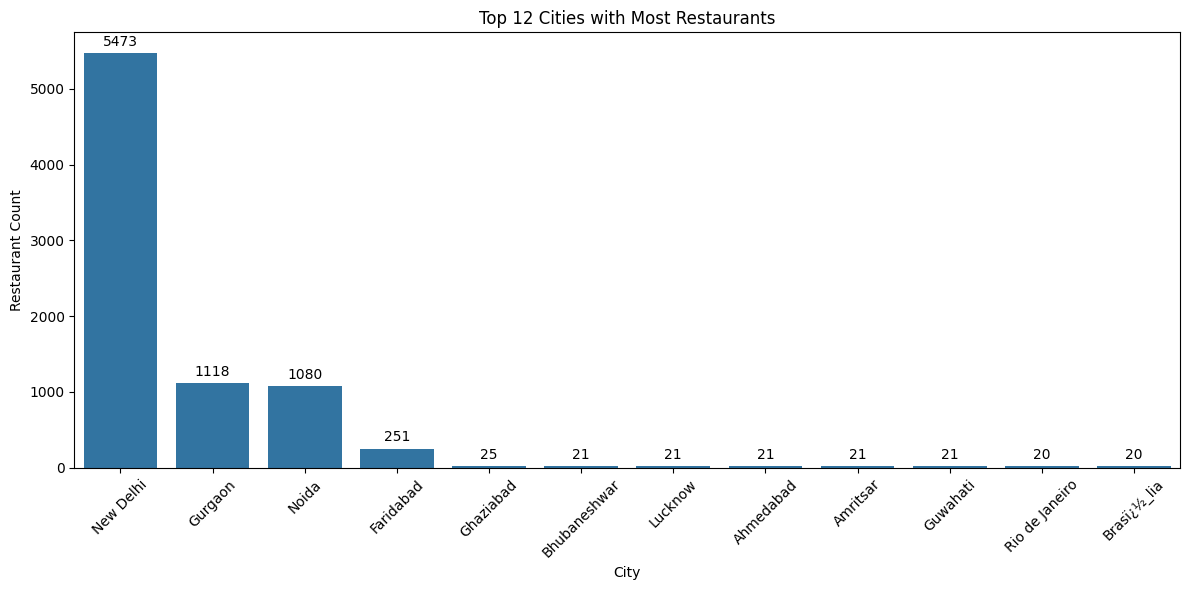

In [47]:
# -----------------------------
# 2. Group by City & Count
# -----------------------------
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Restaurant Count']

# Plot top 12 cities
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=city_counts.head(12), x='City', y='Restaurant Count')
plt.title('Top 12 Cities with Most Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)



***From above graph we can see that New Delhi has most of restaurants.***

In [14]:

# -----------------------------
# 3. Statistics: Ratings, Price Range by City
# -----------------------------
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).reset_index()

print("\nAverage Rating and Price Range by City:")
print(city_stats.sort_values(by='Aggregate rating', ascending=False).head(15))


Average Rating and Price Range by City:
                 City  Aggregate rating  Price range
56         Inner City          4.900000         4.00
107       Quezon City          4.800000         3.00
73        Makati City          4.650000         3.00
95         Pasig City          4.633333         3.00
75   Mandaluyong City          4.625000         3.75
15         Beechworth          4.600000         2.00
67             London          4.535000         3.00
123       Taguig City          4.525000         3.50
116      Secunderabad          4.500000         2.00
66            Lincoln          4.500000         2.00
122     Tagaytay City          4.500000         3.00
91            Orlando          4.475000         2.90
124         Tampa Bay          4.410000         2.55
110    Rest of Hawaii          4.410000         2.35
92          Palm Cove          4.400000         3.00


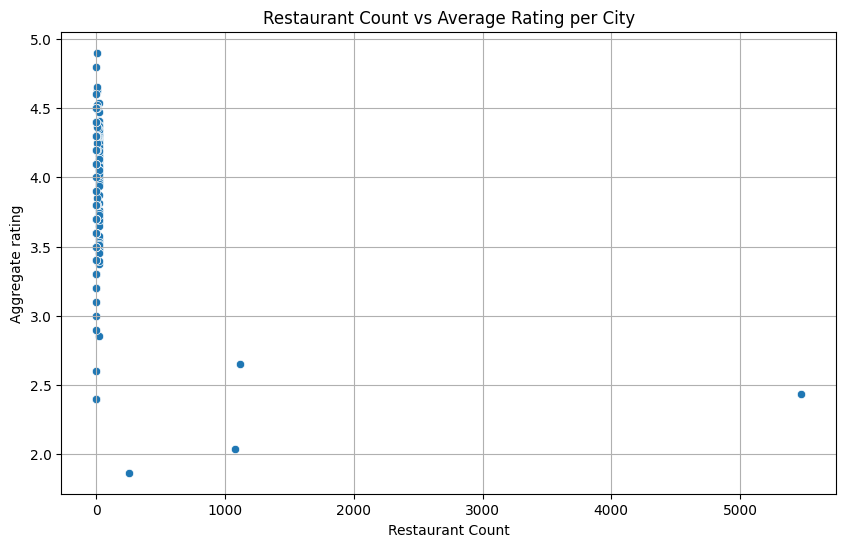

In [8]:
# -----------------------------
# 4. Pattern Analysis: Rating vs Restaurant Count
# -----------------------------
merged = pd.merge(city_counts, city_stats, on='City')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Restaurant Count', y='Aggregate rating')
plt.title('Restaurant Count vs Average Rating per City')
plt.grid(True)
plt.show()

***5. Distribution of Ratings***

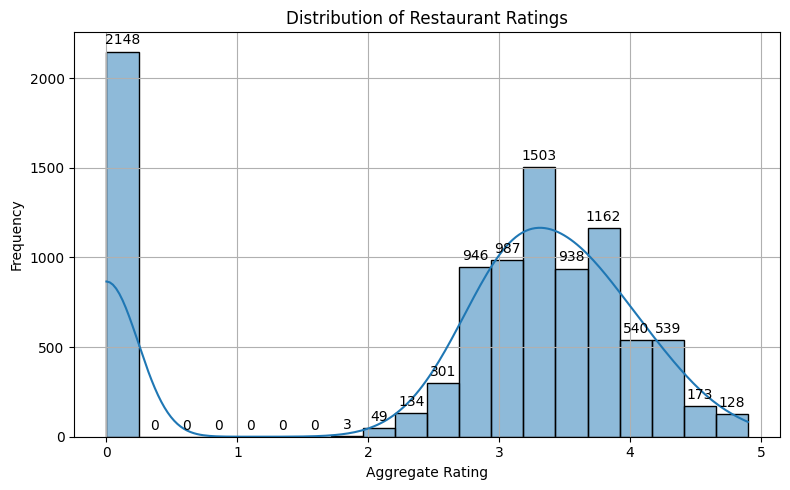

In [29]:
plt.figure(figsize=(8, 5))
ax=sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.show()


***6. Top Cuisines***

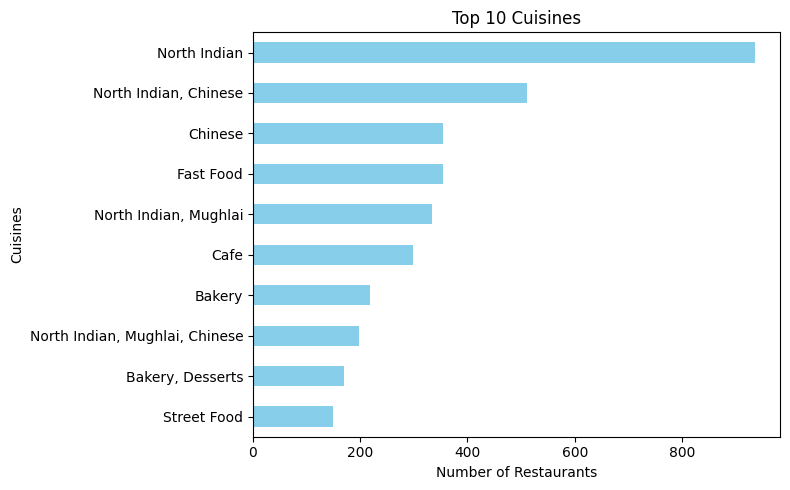

In [30]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

***7. Price Range Distribution***

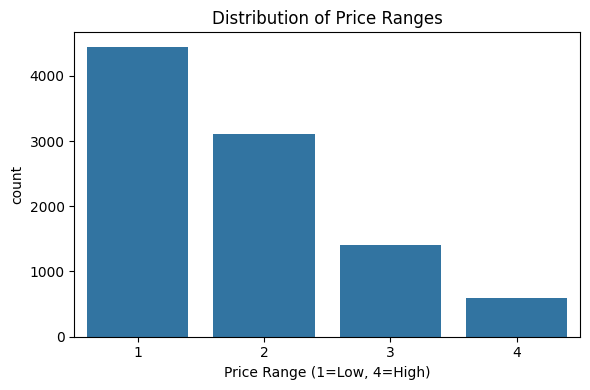

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Price range')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range (1=Low, 4=High)')
plt.tight_layout()
plt.show()


***8.Top Rated Restaurants***

In [33]:
top_rated = df[df['Aggregate rating'] >= 4.5].sort_values(by='Aggregate rating', ascending=False)
print("Top Rated Restaurants:\n", top_rated[['Restaurant Name', 'City', 'Aggregate rating']].head(10))


Top Rated Restaurants:
                                Restaurant Name              City  \
3                                         Ooma  Mandaluyong City   
9540                          Draft Gastro Pub     ï¿½ï¿½stanbul   
10                            Silantro Fil-Mex        Pasig City   
8     Spiral - Sofitel Philippine Plaza Manila        Pasay City   
9404                                    Solita        Manchester   
9457                    Cube - Tasting Kitchen        Inner City   
9458                                Urbanologi        Inner City   
9538                                 Starbucks     ï¿½ï¿½stanbul   
9424                 Mainland China Restaurant              Doha   
9379                                 Flat Iron            London   

      Aggregate rating  
3                  4.9  
9540               4.9  
10                 4.9  
8                  4.9  
9404               4.9  
9457               4.9  
9458               4.9  
9538               4.9  
94

***9.Restaurants Offering Online Delivery***

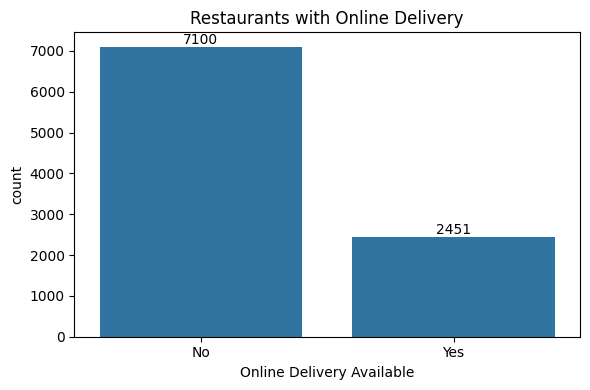

In [37]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(data=df, x='Has Online delivery')
plt.title('Restaurants with Online Delivery')
plt.xlabel('Online Delivery Available')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()


***10. Save data summaries to CSV for reporting***

In [39]:
city_counts.to_csv("city_restaurant_counts.csv", index=False)
city_stats.to_csv("city_stats.csv", index=False)
top_rated.to_csv("top_rated_restaurants.csv", index=False)
